# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

The data is San Francisco's Police Report from 2018 to present.

https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783

I will also try to combine the data from 2003 to 2018.

https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

Since I never worked with time series data, I thought this dataset would be a good starter. 

I'm also from San Francisco and I intend to move back after I graduate MSDS so I'm curious about the city's crime numbers. I heard from friends that the number of crimes have been increasing since COVID so I wanted to see for myself.

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

Here are some of the things I would like to explore for crime reports.

1. Most common type of crime.
2. See if there are trends for what time/ day a crime would occur.
3. Most common neighborhoods where a crime occur.
4. Analyze if certain crimes are more common in particular neightborhoods than others.
5. Check if there is a seasonal trend for crimes to increase.
6. Compute crime rate per 1000 people of San Francisco over time. (I will lookup San Francisco's monthly population to compute)
7. Compute hypothesis tests if rich neighborhoods have lower crime rate than others.

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [17]:
df1 = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv') # Data from 2018 to present
df2 = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv') # Data from 2003 to present

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [12]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
df1.info()
df2.info()
# TODO: Use the head() method to inspect the first five (or more) rows of the data
df1.head()
df2.head()
# TODO: Use the tail() method to inspect the last five (or more) rows of the data
df1.tail()
df2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581102 entries, 0 to 581101
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     581102 non-null  object 
 1   Incident Date                                         581102 non-null  object 
 2   Incident Time                                         581102 non-null  object 
 3   Incident Year                                         581102 non-null  int64  
 4   Incident Day of Week                                  581102 non-null  object 
 5   Report Datetime                                       581102 non-null  object 
 6   Row ID                                                581102 non-null  int64  
 7   Incident ID                                           581102 non-null  int64  
 8   Incident Number                             

Incident Datetime Incident Date Incident Time  Incident Year Incident Day of Week         Report Datetime        Row ID  Incident ID  Incident Number   CAD Number Report Type Code Report Type Description Filed Online  Incident Code   Incident Category    Incident Subcategory                       Incident Description      Resolution          Intersection         CNN Police District  Analysis Neighborhood  Supervisor District   Latitude   Longitude  \
0  2021/09/29 12:59:00 PM    2021/09/29         12:59           2021            Wednesday  2021/09/29 06:48:00 PM  107597928150      1075979        216138427          NaN               II        Coplogic Initial         True          28150  Malicious Mischief               Vandalism  Malicious Mischief, Vandalism to Property  Open or Active                   NaN         NaN       Ingleside                    NaN                  NaN        NaN         NaN   
1  2021/05/14 01:51:00 AM    2021/05/14         01:51           2021               Friday  2021/05/14 01:57:00 AM  103010326030      1030103        210295348  211340138.0               II                 Initial          NaN          26030               Arson                   Arson                                      Arson  Open or Active  03RD ST \ CUSTER AVE  20240000.0         Bayview  Bayview Hunters Point                 10.0  37.744259 -122.387373   
2  2021/03/01 08:00:00 AM    2021/03/01         08:00           2021               Monday  2021/09/26 11:40:00 AM  107606971000      1076069        216138659          NaN               II        Coplogic Initial         True          71000       Lost Property           Lost Property                              Lost Property  Open or Active                   NaN         NaN        Southern                    NaN                  NaN        NaN         NaN   
3  2021/04/01 12:00:00 PM    2021/04/01         12:00           2021             Thursday  2021/05/04 09:22:00 AM  102792271000      1027922        216049830          NaN               II        Coplogic Initial         True          71000       Lost Property           Lost Property                              Lost Property  Open or Active                   NaN         NaN            Park                    NaN                  NaN        NaN         NaN   
4  2021/06/01 07:01:00 AM    2021/06/01         07:01           2021              Tuesday  2021/09/19 06:21:00 AM  107592206244      1075922        216138552          NaN               II        Coplogic Initial         True           6244       Larceny Theft  Larceny - From Vehicle          Theft, From Locked Vehicle, >$950  Open or Active                   NaN         NaN        Southern                    NaN                  NaN        NaN         NaN   

                                           Point  Neighborhoods  ESNCAG - Boundary File  Central Market/Tenderloin Boundary Polygon - Updated  Civic Center Harm Reduction Project Boundary  HSOC Zones as of 2018-06-05  Invest In Neighborhoods (IIN) Areas  Current Supervisor Districts  Current Police Districts  
0                                            NaN            NaN                     NaN                                                NaN                                              NaN                          NaN                                  NaN                           NaN                       NaN  
1  POINT (-122.38737260846696 37.74425940578451)           56.0                     NaN                                                NaN                                              NaN                          NaN                                  NaN                           9.0                       2.0  
2                                            NaN            NaN                     NaN                                                NaN                                              NaN                          NaN                                  NaN                           NaN          

PdId  IncidntNum  Incident Code        Category                     Descript  DayOfWeek        Date   Time PdDistrict Resolution                    Address           X          Y                                      location  SF Find Neighborhoods 2 2  Current Police Districts 2 2  Current Supervisor Districts 2 2  Analysis Neighborhoods 2 2  DELETE - Fire Prevention Districts 2 2  DELETE - Police Districts 2 2  DELETE - Supervisor Districts 2 2  DELETE - Zip Codes 2 2  \
0   3114751606302    31147516           6302   LARCENY/THEFT  PETTY THEFT FROM A BUILDING     Sunday  09/28/2003  10:00   SOUTHERN       NONE        1ST ST / BRANNAN ST -120.500000  90.000000                POINT (-120.50000000000001 90)                        NaN                           NaN                               NaN                         NaN                                     NaN                            NaN                                NaN                     NaN   
1   5069701104134    50697011           4134         ASSAULT                      BATTERY  Wednesday  06/22/2005  12:20   NORTHERN       NONE      1200 Block of EDDY ST -122.428223  37.781896  POINT (-122.42822330317601 37.7818959488603)                       97.0                           4.0                              11.0                        39.0                                     7.0                            9.0                               11.0                 29490.0   
2   6074729204104    60747292           4104         ASSAULT                      ASSAULT   Saturday  07/15/2006  00:55    CENTRAL       NONE    1600 Block of POWELL ST -122.410672  37.799789   POINT (-122.41067242533701 37.799788690123)                      106.0                           6.0                               3.0                         6.0                                     3.0                            1.0                               10.0                   308.0   
3   7103536315201    71035363          15201         ASSAULT                     STALKING    Tuesday  09/25/2007  00:01    TARAVAL       NONE      400 Block of ULLOA ST -122.458226  37.741362    POINT (-122.458226300605 37.7413616001449)                       49.0                          10.0                               8.0                        41.0                                     1.0                            8.0                                4.0                    59.0   
4  11082415274000   110824152          74000  MISSING PERSON                MISSING ADULT   Saturday  09/24/2011  11:00    TARAVAL    LOCATED  3200 Block of SAN JOSE AV -122.459173  37.708200    POINT (-122.459172646607 37.7082001648459)                        NaN                           NaN                               NaN                         NaN                                     NaN                            NaN                                NaN                 28588.0   

   DELETE - Neighborhoods 2 2  DELETE - 2017 Fix It Zones 2 2  Civic Center Harm Reduction Project Boundary 2 2  Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  Fix It Zones as of 2018-02-07 2 2  CBD, BID and GBD Boundaries as of 2017 2 2  Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  Central Market/Tenderloin Boundary Polygon - Updated 2 2  HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
0                         NaN                             NaN                                               NaN                                 NaN                      NaN                                NaN                                         NaN                               NaN                                     NaN                                                NaN                                     NaN                     NaN              NaN  
1                        41.0                             NaN                                               NaN                                 NaN     

Incident Datetime Incident Date Incident Time  Incident Year Incident Day of Week         Report Datetime       Row ID  Incident ID  Incident Number   CAD Number Report Type Code Report Type Description Filed Online  Incident Code Incident Category         Incident Subcategory                 Incident Description            Resolution              Intersection         CNN Police District Analysis Neighborhood  Supervisor District   Latitude   Longitude  \
581097  2021/01/15 08:00:00 PM    2021/01/15         20:00           2021               Friday  2021/01/18 11:03:00 PM  99729103074       997291        210041000  210183477.0               II                 Initial          NaN           3074           Robbery              Robbery - Other                    Robbery, W/ Force  Cite or Arrest Adult  OFARRELL ST \ SHANNON ST  24944000.0      Tenderloin            Tenderloin                  6.0  37.785893 -122.412148   
581098  2020/08/01 05:34:00 PM    2020/08/01         17:34           2020             Saturday  2020/08/01 06:04:00 PM  94911806361       949118        200461010  202142200.0               II                 Initial          NaN           6361     Larceny Theft  Larceny Theft - Shoplifting             Theft, Shoplifting, <$50        Open or Active     GEARY BLVD \ 17TH AVE  27500000.0        Richmond        Outer Richmond                  1.0  37.780476 -122.476169   
581099  2020/06/01 01:55:00 AM    2020/06/01         01:55           2020               Monday  2020/06/01 01:55:00 AM  93192005061       931920        200330863  201530294.0               II                 Initial          NaN           5061          Burglary        Burglary - Commercial  Burglary, Warehouse, Forcible Entry        Open or Active    24TH ST \ MINNESOTA ST  23610000.0         Bayview          Potrero Hill                 10.0  37.754000 -122.389860   
581100  2020/10/24 05:00:00 PM    2020/10/24         17:00           2020             Saturday  2020/10/24 06:34:00 PM  97231606244       972316        200642975  202982445.0               II                 Initial          NaN           6244     Larceny Theft       Larceny - From Vehicle    Theft, From Locked Vehicle, >$950        Open or Active    STEINER ST \ FULTON ST  26042000.0        Northern      Western Addition                  5.0  37.777490 -122.433219   
581101  2020/11/19 08:30:00 AM    2020/11/19         08:30           2020             Thursday  2020/11/20 12:46:00 AM  97988375000       979883        200700573  203250046.0               II                 Initial          NaN          75000    Missing Person               Missing Person                         Found Person     Exceptional Adult  HURON AVE \ FARRAGUT AVE  21554000.0       Ingleside         Outer Mission                 11.0  37.711118 -122.450774   

                                                 Point  Neighborhoods  ESNCAG - Boundary File  Central Market/Tenderloin Boundary Polygon - Updated  Civic Center Harm Reduction Project Boundary  HSOC Zones as of 2018-06-05  Invest In Neighborhoods (IIN) Areas  Current Supervisor Districts  Current Police Districts  
581097   POINT (-122.41214750780264 37.78589292711297)           20.0                     NaN                                                1.0                                              NaN                          NaN                                  NaN                          10.0                       5.0  
581098  POINT (-122.47616919036905 37.780475849410344)            5.0                     NaN                                                NaN                                              NaN                          NaN                                  NaN                           4.0                       8.0  
581099   POINT (-122.38985954971992 37.75399971361786)           56.0                     NaN                                                NaN                                              NaN                          N

PdId  IncidntNum  Incident Code        Category                                   Descript  DayOfWeek        Date   Time PdDistrict      Resolution                        Address           X          Y                                        location  SF Find Neighborhoods 2 2  Current Police Districts 2 2  Current Supervisor Districts 2 2  Analysis Neighborhoods 2 2  DELETE - Fire Prevention Districts 2 2  DELETE - Police Districts 2 2  DELETE - Supervisor Districts 2 2  \
2129520  17050730416710   170507304          16710   DRUG/NARCOTIC      POSSESSION OF NARCOTICS PARAPHERNALIA   Thursday  06/22/2017  01:42    CENTRAL   ARREST, CITED         BROADWAY ST / DAVIS ST -122.398699  37.798880  POINT (-122.39869911640743 37.798880026259866)                       77.0                           6.0                               3.0                         8.0                                     3.0                            1.0                               10.0   
2129521  17071435504014   170714355           4014         ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE     Friday  09/01/2017  17:00       PARK            NONE  HAIGHT ST / BUENAVISTAWEST AV -122.443312  37.770470   POINT (-122.44331194960198 37.77046975485389)                      112.0                           7.0                               5.0                         3.0                                    15.0                            5.0                                5.0   
2129522  17053348465010   170533484          65010  OTHER OFFENSES                   TRAFFIC VIOLATION ARREST     Friday  06/30/2017  17:50    BAYVIEW  ARREST, BOOKED          ILLINOIS ST / 23RD ST -122.387068  37.755446   POINT (-122.38706797754722 37.75544602661817)                       56.0                           2.0                               9.0                        26.0                                    10.0                            3.0                                8.0   
2129523  17102776330130   171027763          30130  OTHER OFFENSES                 PEDDLING WITHOUT A LICENSE  Wednesday  12/20/2017  15:41   SOUTHERN  ARREST, BOOKED             7TH ST / MARKET ST -122.412515  37.780478   POINT (-122.41251534135559 37.78047774805081)                       21.0                           5.0                              10.0                        34.0                                     8.0                            2.0                                9.0   
2129524  17088142128160   170881421          28160       VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Friday  10/27/2017  21:30  INGLESIDE            NONE         100 Block of MONETA WY -122.451217  37.712061   POINT (-122.4512170784155 37.712061003833156)                       66.0                           9.0                               1.0                        28.0                                     9.0                            7.0                                6.0   

         DELETE - Zip Codes 2 2  DELETE - Neighborhoods 2 2  DELETE - 2017 Fix It Zones 2 2  Civic Center Harm Reduction Project Boundary 2 2  Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  Fix It Zones as of 2018-02-07 2 2  CBD, BID and GBD Boundaries as of 2017 2 2  Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  Central Market/Tenderloin Boundary Polygon - Updated 2 2  HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
2129520                 28860.0                         6.0                             NaN                                               NaN                                 NaN                      NaN                                NaN                                         NaN                               1.0                                     NaN                                                NaN                                     NaN                     NaN             77.0  
2129521                 29492.0                         

<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

1. I would like to learn if crimes are actually increasing in San Francisco as my friends told me. If it's increasing, I want to know which neighborhood are affected the most with types of crimes.

2. I don't have any hunch on this data. I only know that a few of my friends have told me that crimes were increasing in San Francisco. In fact, one of them had their items stolen since the burgular broken into their car. 

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

In [13]:
df1.shape[0] + df2.shape[0]
df1['Incident Number'].nunique()  + df2['IncidntNum'].nunique()

2710627

2122712

1. The population being represented are police incident reports in San Francisco.
2. The total population size is 2,710,627. The number of unique incidents are 2,122,712. I took this data last month so this number will probably slightly increase with updated numbers by the time I start the project.

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

The data is the complete incident reports filed by SFPD.
According to their [webiste](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783), the data are filed by officers or self-reported by members of the public using SFPD’s online reporting system. Data is added once incident reports have been reviewed and approved by a supervising Sergeant or Lieutenant. Incident reports may be removed from the dataset if in compliance with court orders to seal records or for administrative purposes such as active internal affair investigations and/or criminal investigations.

I think it is safe to say that this dataset is the most comprehensive data to get numbers of police incident reports in San Francisco.

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581102 entries, 0 to 581101
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     581102 non-null  object 
 1   Incident Date                                         581102 non-null  object 
 2   Incident Time                                         581102 non-null  object 
 3   Incident Year                                         581102 non-null  int64  
 4   Incident Day of Week                                  581102 non-null  object 
 5   Report Datetime                                       581102 non-null  object 
 6   Row ID                                                581102 non-null  int64  
 7   Incident ID                                           581102 non-null  int64  
 8   Incident Number                             

My dataset will consist two tables. The first would be for incidents since January 2018 to present and the second will be incidents between January 2013 to May 2018. 
There are 34 and 35 columns respectively. The column names are different but the content are identical so there won't be a problem concatenating the data. I will use the following columns.

- Incident Date: The date the incident occurred
- Incident Time: The time the incident occurred
- Incident Year: The year the incident occurred, provided as a convenience for filtering
- Incident Day of Week: The day of week the incident occurred
- Incident Number: The number issued on the report, sometimes interchangeably referred to as the Case Number. This number is used to reference cases and report documents.
- Incident Code: A number that is associated to incident category.
- Incident Category: A category mapped on to the Incident Code used in statistics and reporting.
- Incident Description: The description of the incident that corresponds with the Incident Code. 
- Resolution: The resolution of the incident at the time of the report.
- Police District: The Police District where the incident occurred.
- Analysis Neighborhood: This field is used to identify the neighborhood where each incident occurs. 
- Neighborhoods: Neighborhood code

<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

# Overview of data cleaning

I've combined 2 datasets of police reports in San Francisco. The first dataset was from January 2013 to May 2018. The second dataset was from January 2018 to present. The 2 datasets are structured differently so there were quite a few inconsistencies. 

Before my data cleaning process,  I started from with 2,710,627 rows and 34 columns. After cleaning my data, I ended up with 2,377,391 and 10 columns. I removed inconsistent rows, columns, duplicates, and missing values along the way. I have not removed any outliers for crime/incident types, but I did recategorize them to 10 different categories.  I have displayed a couple of visualization towards the end of this section to show a general idea of the trend of crimes and incidents in San Francisco. With the visualization, I was able to quickly notice that there was a significant dip in crimes and incidents during the COVID pandemic.

In [49]:
df1 = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv') # Data from 2018 to present
df2 = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv') # Data from 2003 to present

In [50]:
df1 = df1[df1.columns[:-7]]
df2 = df2[df2.columns[:-20]]
df2['Year'] = df2['Date'].str[-4:]
df2['Incident Subcategory'] = None
df2['Analysis Neighborhood'] = None

In [51]:
df1_columns = ['Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week',
               'Incident Number', 'Incident Code', 'Incident Category', 'Incident Subcategory', 
               'Incident Description', 'Resolution', 'Police District', 'Analysis Neighborhood', 
               'Latitude', 'Longitude', 'Point', 'Neighborhoods']
df2_columns = ['Date', 'Time', 'Year', 'DayOfWeek', 
               'IncidntNum', 'Incident Code', 'Category', 'Incident Subcategory',
               'Descript', 'Resolution', 'PdDistrict', 'Analysis Neighborhood', 
               'Y', 'X', 'location', 'SF Find Neighborhoods 2 2']
df1 = df1[df1_columns]
df2 = df2[df2_columns]
df2.columns = df1_columns
df1['Incident Date'] = pd.to_datetime(df1['Incident Date'])
df2['Incident Date'] = pd.to_datetime(df2['Incident Date'])

### 1.1 Removing duplicate data

In [9]:
# Original number of rows
before_count = len(df1) + len(df2)
print(before_count)
# Number of rows to remove due to duplicates
after_count = len(df2[df2['Incident Date'] >= '2018'])
print(f'Removed {after_count} rows')
print(before_count - after_count)

2710627
Removed 45059 rows
2665568


### Combining data

In [52]:
df2 = df2[df2['Incident Date'] < '2018']
df = pd.concat([df1, df2]).reset_index(drop=True)

### Capitalizing all words.
### Filling nan values in incident category with incident description.
### Creating new sub-category of incidents.

In [53]:
# Capitalizing all words.
col_to_capitalize = ['Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Police District', 'Point']
for col in col_to_capitalize:
    df[col] = df[col].str.capitalize()

# Filling nan values in incident category with incident description
df['Incident Category'] = np.where(df['Incident Category'].isna(), df['Incident Description'], df['Incident Category'])

# Subcategorizing each incidents.

def categorize(category):
    category_lower = category.lower()
    remove_categories = ['non-criminal', 'case closure', 'civil sidewalks', 'impounded', 'misplaced', 'sfmta', 'lost property']
    prostitution_words = ['human trafficking', 'prostitution', 'pimp']
    drug_words = ['drug', 'narcotic']
    fraud_words = ['fraud', 'forgery', 'counterfeiting', 'bad checks']
    damage_words = ['vandalism', 'mischief', 'arson']
    collision_words = ['collision']
    theft_words = ['burglary', 'larceny', 'theft', 'vehicle', 'stolen', 'embezzlement', 'extortion']
    sex_words = ['sex', 'rape']
    violent_words = ['assault', 'violence', 'kidnapping', 'offence', 'offense', 'robbery']
    death_words = ['homicide']
    
    if any(word in category_lower for word in remove_categories):
        return 'Non-crime'
    elif any(word in category_lower for word in prostitution_words):
        return 'Prostitution'
    elif any(word in category_lower for word in drug_words):
        return 'Drug'
    elif any(word in category_lower for word in fraud_words):
        return 'Fraud'
    elif any(word in category_lower for word in damage_words):
        return 'Property-damages'
    elif any(word in category_lower for word in collision_words):
        return 'Traffic-collision'
    elif any(word in category_lower for word in theft_words):
        return 'Theft'
    elif any(word in category_lower for word in sex_words):
        return 'Sexual-assault'
    elif any(word in category_lower for word in violent_words):
        return 'Violent'
    elif any(word in category_lower for word in death_words):
        return 'Homicide'
    else:
        return 'Other'

df['Category'] = df['Incident Category'].apply(categorize)

In [28]:
df['Incident Category'].nunique()
df['Category'].nunique()

87

11

In [70]:
df[(df['Incident Date'] >= '2018') & (df['Category'] == 'Violent')]['Incident Category'].unique()

array(['Assault', 'Weapons offense',
       'Offences against the family and children', 'Other offenses',
       'Robbery', 'Gun violence restraining order', 'Weapons offence',
       'Assault, commission of while armed',
       'Gun violence restraining order violation',
       'Assault, by police officers'], dtype=object)

In [69]:
df[(df['Incident Date'] <= '2018') & (df['Category'] == 'Violent')]['Incident Category'].unique()

array(['Assault', 'Robbery', 'Other offenses', 'Weapons offense',
       'Offences against the family and children', 'Kidnapping'],
      dtype=object)

In [29]:
df[df['Category'] == 'Other']['Incident Category'].unique()

array(['Suspicious occ', 'Other miscellaneous', 'Weapons carrying etc',
       'Warrant', 'Disorderly conduct', 'Miscellaneous investigation',
       'Missing person', 'Suspicious', 'Traffic violation arrest',
       'Other', 'Courtesy report', 'Fire report', 'Suicide',
       'Liquor laws', 'Gambling',
       'Public health order violation, notification',
       'Public health order violation, after notification',
       'Cloned cellular phone, use', 'Military ordinance',
       'Crimes involving receipts or titles',
       'Pyrotechnic explosive device - barrel bomb', 'Weapon laws',
       'Trespass', 'Warrants', 'Driving under the influence',
       'Secondary codes', 'Drunkenness', 'Loitering', 'Bribery',
       'Pornography/obscene mat', 'Trea'], dtype=object)

### 1.2 Removing non-crime rows

In [30]:
df.shape
before_count = len(df)
# Removing non-criminal cases
df = df[df['Category'] != 'Non-crime']
df.shape
after_count = len(df)
print(f'\nRemoved {before_count - after_count} rows')

(2665568, 17)

(2377392, 17)


Removed 288176 rows


In [31]:
df.shape
df[df['Police District'].isna()] # Removing one data that has no police district or neighborhood info
df = df[df['Police District'].notna()].reset_index(drop=True)
df.shape
print(f'\nRemoved {after_count - len(df)} rows')

(2377392, 17)

Incident Date Incident Time Incident Year Incident Day of Week  Incident Number  Incident Code Incident Category Incident Subcategory          Incident Description Resolution Police District Analysis Neighborhood   Latitude   Longitude                                         Point  Neighborhoods Category
643640    2016-01-17         23:54          2016               Sunday        166018573           6244     Larceny/theft                 None  Grand theft from locked auto       None             NaN                  None  37.708202 -122.413352  Point (-122.4133519852842 37.70820245849022)            NaN    Theft

(2377391, 17)


Removed 1 rows


### Renaming neighborhood names

In [32]:
# Renaming neighborhood names. If nan, replace name with police district.

neighborhood_code = {}
for code in sorted(df['Neighborhoods'].unique())[1:]:
    try:
        neighborhood = df1[df1['Neighborhoods'] == code]['Analysis Neighborhood'].iloc[0]
        if code not in neighborhood_code:
            neighborhood_code[code] = neighborhood
    except:
        neighborhood = df[df['Neighborhoods'] == code]['Police District'].iloc[0]
        if code not in neighborhood_code:
            neighborhood_code[code] = neighborhood
            
df['Neighborhoods'] = np.where(df['Neighborhoods'].isna(), df['Police District'], df['Neighborhoods'].map(neighborhood_code))

### Removing unnecessary columns

In [33]:
df.info(show_counts=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377391 entries, 0 to 2377390
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Incident Date          2377391 non-null  datetime64[ns]
 1   Incident Time          2377391 non-null  object        
 2   Incident Year          2377391 non-null  object        
 3   Incident Day of Week   2377391 non-null  object        
 4   Incident Number        2377391 non-null  int64         
 5   Incident Code          2377391 non-null  int64         
 6   Incident Category      2377391 non-null  object        
 7   Incident Subcategory   524137 non-null   object        
 8   Incident Description   2377391 non-null  object        
 9   Resolution             2377391 non-null  object        
 10  Police District        2377391 non-null  object        
 11  Analysis Neighborhood  498235 non-null   object        
 12  Latitude               23511

(2377391, 17)

In [34]:
df_columns_keep = ['Incident Date',
                  'Incident Time',
                  'Incident Year',
                  'Incident Day of Week',
                  'Incident Number',
                  'Category',
                  'Police District',
                  'Neighborhoods',
                  'Resolution'
                  ]
df = df[df_columns_keep]
df = df.sort_values(['Incident Date', 'Incident Time']).reset_index(drop=True)

In [35]:
df.info(show_counts=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377391 entries, 0 to 2377390
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Incident Date         2377391 non-null  datetime64[ns]
 1   Incident Time         2377391 non-null  object        
 2   Incident Year         2377391 non-null  object        
 3   Incident Day of Week  2377391 non-null  object        
 4   Incident Number       2377391 non-null  int64         
 5   Category              2377391 non-null  object        
 6   Police District       2377391 non-null  object        
 7   Neighborhoods         2377391 non-null  object        
 8   Resolution            2377391 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 163.2+ MB


(2377391, 9)

### Add month and day column
### Reorder and rename column

In [36]:
df.head()

Incident Date Incident Time Incident Year Incident Day of Week  Incident Number Category Police District                   Neighborhoods      Resolution
0    2003-01-01         00:01          2003            Wednesday         30322341    Other         Taraval                 Sunset/Parkside       Unfounded
1    2003-01-01         00:01          2003            Wednesday         51362409    Fraud       Ingleside                   Outer Mission  Not prosecuted
2    2003-01-01         00:01          2003            Wednesday         50753390    Fraud         Bayview           Bayview Hunters Point            None
3    2003-01-01         00:01          2003            Wednesday         41416367  Violent         Bayview                         Portola            None
4    2003-01-01         00:01          2003            Wednesday         40232138    Fraud        Southern  Financial District/South Beach            None

In [37]:
df['Incident Month'] = df['Incident Date'].dt.month
df['Incident Day'] = df['Incident Date'].dt.day
df['Incident Year'] = df['Incident Year'].astype(int)
df['Incident Hour']= pd.to_datetime(df['Incident Time']).dt.hour

In [38]:
df_column_reordered = ['Incident Date',
                       'Incident Year',
                       'Incident Month',
                       'Incident Day',
                       'Incident Hour',
                       'Incident Time',
                       'Incident Day of Week',
                       'Incident Number',
                       'Category',
                       'Neighborhoods',
                       'Police District',
                       'Resolution'
                         ]
df = df[df_column_reordered]

df_column_renamed = ['Date',
                     'Year',
                     'Month',
                     'Day',
                     'Hour',
                     'Time',
                     'DOW',
                     'Number',
                     'Category',
                     'Neighborhood',
                     'PD',
                     'Resolution'
                         ]

df.columns = df_column_renamed

### Crime and incidents over the years in San Francisco

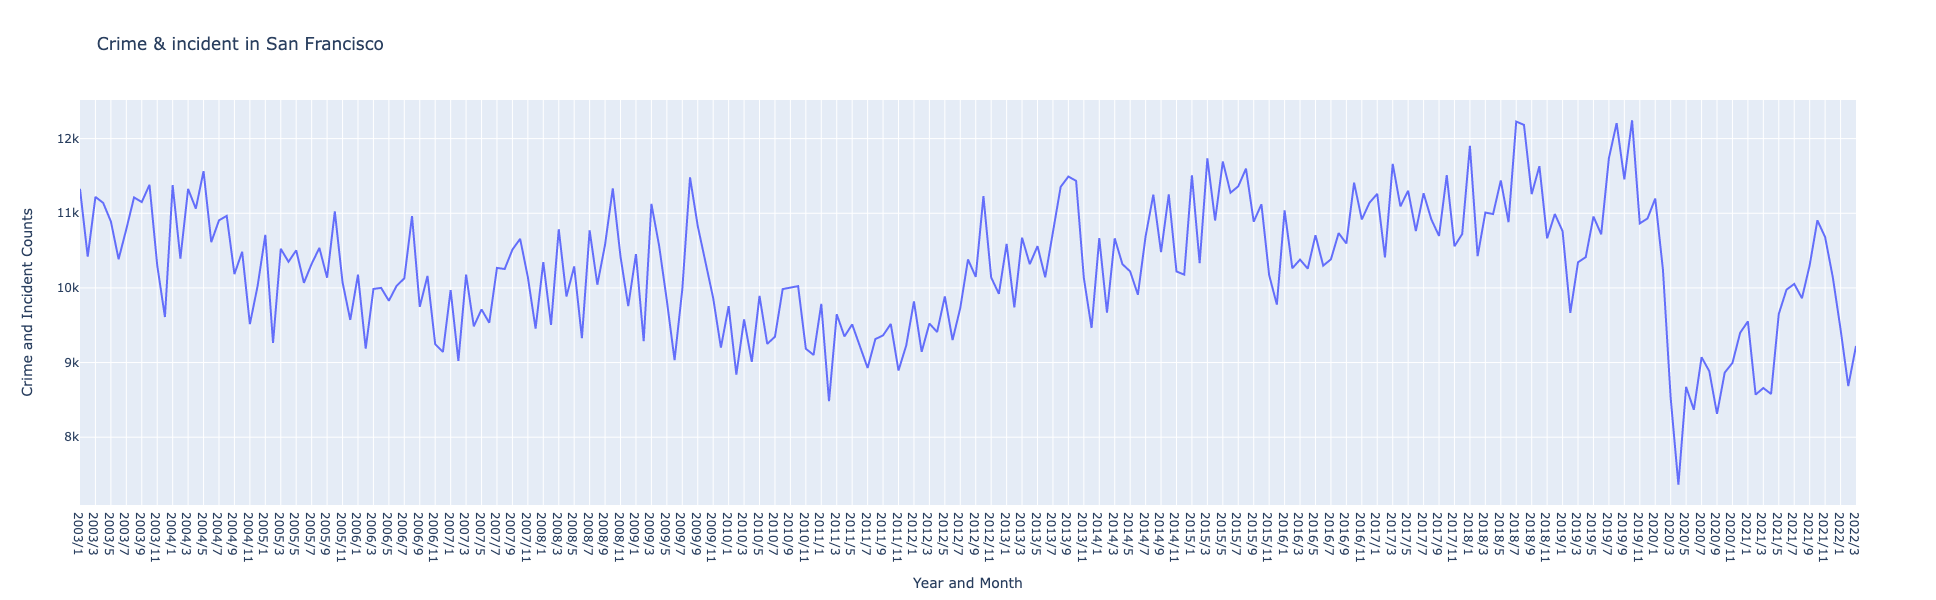

In [39]:
crime_per_yymm = df.groupby(['Year', 'Month']).count().sort_values(['Year', 'Month'], ascending=True).Date
x_ = [f'{yy}/{mm}' for yy, mm in crime_per_yymm.index][:-1]
fig = px.line(crime_per_yymm, x = x_, y = crime_per_yymm.values[:-1],  
        title='Crime & incident in San Francisco')

fig.update_layout(height = 600, xaxis_title = 'Year and Month', yaxis_title = 'Crime and Incident Counts')

### Save to csv file

In [40]:
df.to_csv('sf_police_report.csv', index=False)

### Read csv

In [75]:
df = pd.read_csv('sf_police_report.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df.Year != 2022]

### Top crime/incident categories in San Francisco

In [76]:
crime_types = pd.DataFrame(df['Category'].value_counts())
v = crime_types.sort_values(by=['Category'], ascending = False)
v.style.background_gradient(cmap = 'Reds')

In [77]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345500 entries, 0 to 2345499
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Year          int64         
 2   Month         int64         
 3   Day           int64         
 4   Hour          int64         
 5   Time          object        
 6   DOW           object        
 7   Number        int64         
 8   Category      object        
 9   Neighborhood  object        
 10  PD            object        
 11  Resolution    object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 232.6+ MB


(2345500, 12)

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

## EDA 2 Agenda

The agenda for my EDA was to analyze crime of San Francisco over the years. I'm from San Francisco and my friends there have been telling me that crime have been increasing so I wanted to see for myself by looking at the data.

I decided to conduct EDA in the following areas.

1. Day of the week when crimes occur.
2. Time of day when crimes occur.
3. Month when crimes occur. (Consistent throughout the years)
4. Trends of crime over the years.
5. Trends of crimes that are threat to others (Theft, Violent, Property Damages, Sexual-Assault, Homicide)
6. Crimes in different police districts and neighborhoods over the years.
7. Crimes in the top 5 neighborhoods.
8. Crimes in neighborhoods excluding the top 5.

---

### 1. Day of the week

I wanted to start my analysis by seeing if there is a trend of crimes occuring on a certain day of the week. 

- <b>1st figure:</b> Crimes per day of the week from 2003~2021.
- <b>2nd figure:</b> Annual crimes from 2003~2021 (aggregated).
- <b>3rd figure:</b> Annual crimes from 2003~2021 (not aggregated). 

Fridays have the most days when a crime occurs and Sundays having the fewest. Fridays may have more crimes than other days because probably more people simply go out on those days. Sundays may have the fewest crimes because less people go out on this day.

There is no day that have more than 1.5 times crimes than other days. We can also observe that 2020 saw a dip in crimes when the pandemic began. This is probably because more people stayed home due to the lockdowns. The number of crimes increased in 2021. This finding is consistent that my friends mentioned that crimes were increasing in San Francisco, but not at pre-pandemic levels.

In [78]:
crime_DOW_yrs = df.groupby(['Year', 'DOW']).size().reset_index()
crime_DOW_x_yrs = pd.crosstab(index=[crime_DOW_yrs.DOW], columns=crime_DOW_yrs.Year, values=crime_DOW_yrs[0], aggfunc='sum')
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_DOW_x_yrs = crime_DOW_x_yrs.reindex(cats)
crime_DOW_x_yrs.style.background_gradient(cmap = 'Reds', axis=0)

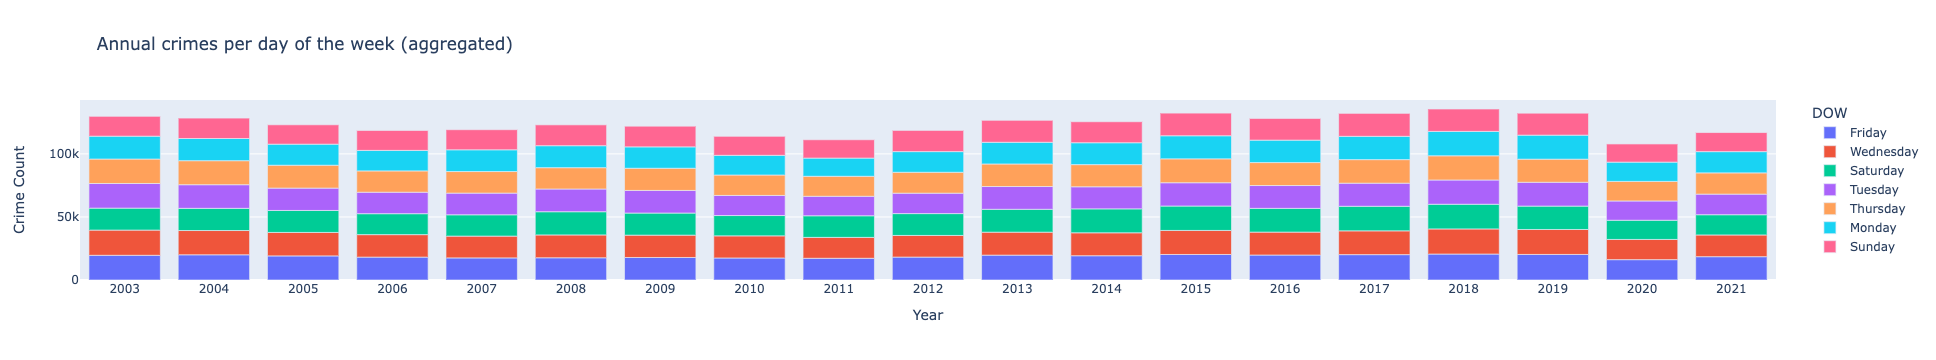

In [79]:
crime_DOW_yrs = df.groupby(['Year', 'DOW']).size().reset_index().sort_values(0, ascending=False)
fig = px.bar(
    crime_DOW_yrs, x="Year",
    y=0, color="DOW",
    title="Annual crimes per day of the week (aggregated)",
    labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(2003,2022)))

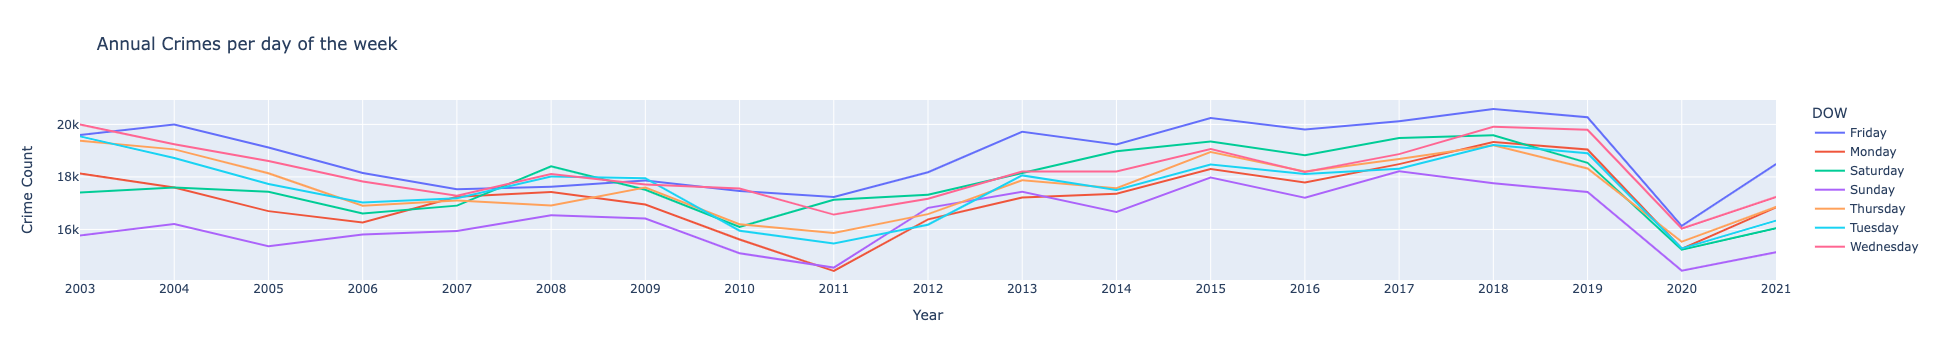

In [80]:
crime_DOW_yrs = df.groupby(['Year', 'DOW']).size().reset_index()
fig = px.line(crime_DOW_yrs, x="Year", y=0, color="DOW", title="Annual Crimes per day of the week", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(2003,2022)))

---

### 2. Time of day

I analyzed the time of day when crimes occur. If I know there's a certain time of day we should avoid, I can give that advise to friends.

- <b>1st figure:</b> Crimes per hour in 24 hour format from 2003~2021.
- <b>2nd figure:</b> Total crimes in each hour from 2003~2021 (aggregated).  
- <b>3rd figure:</b> Total crimes in each hour from 2003~2021 (not aggregated). 

It seems like crimes occur the most around 17 ~ 19th hour (5 ~ 7pm) and 12pm. I think this is because a lot of people go outside of their offices around this time. Since more people are out on the streets, the more chances a crime can occur. We can see that theft crimes are the most common in all hours. The occurance of crime tends to follow a consistent pattern every year of having spikes around the 12th and 17 ~ 19th hour.

In [81]:
hourly_crimes = df.groupby(['Hour', 'Year']).size().reset_index()
hourly_crimes_x_yrs = pd.crosstab(index=[hourly_crimes.Hour], columns=hourly_crimes.Year, values=hourly_crimes[0], aggfunc='sum')
hourly_crimes_x_yrs.style.background_gradient(cmap = 'Reds', axis=0)

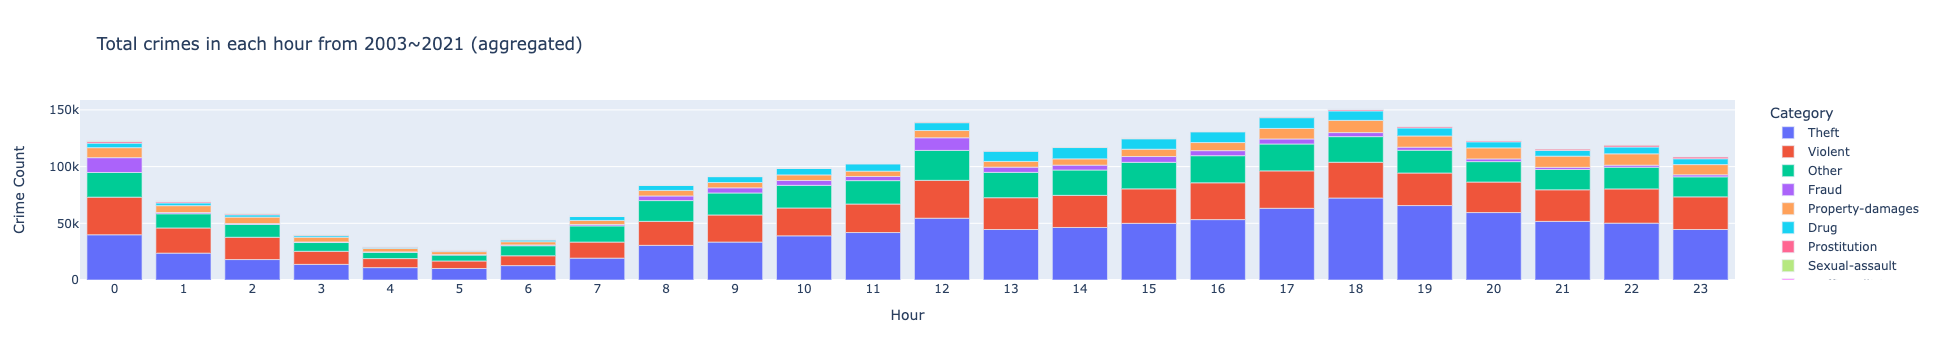

In [82]:
hourly_crimes = df.groupby(['Hour', 'Category']).size().reset_index().sort_values(0, ascending=False)
fig = px.bar(hourly_crimes, x="Hour", y=0, color="Category", title="Total crimes in each hour from 2003~2021 (aggregated)", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(24)))

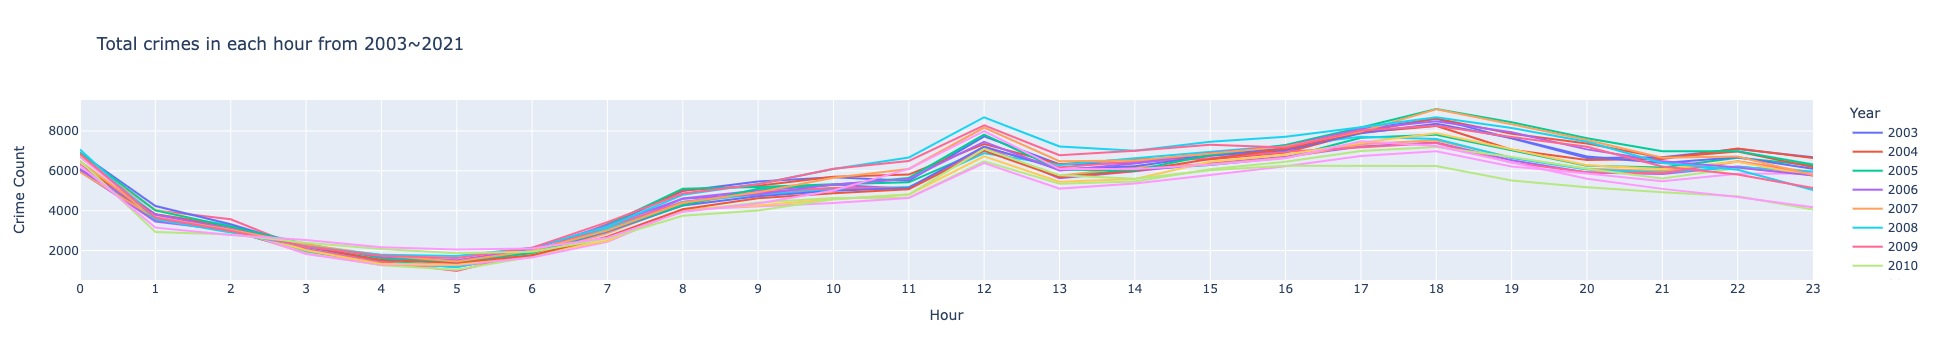

In [83]:
hourly_crime_per_year = df.groupby(['Year', 'Hour']).size().reset_index()
fig = px.line(hourly_crime_per_year, x="Hour", y=0, color="Year", title="Total crimes in each hour from 2003~2021", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(24)))

---

### 3. Months

I wanted to see if there was a seasonal trend for crimes so I analyzed the crimes for each month over the years. 

- <b>1st figure:</b> Average number of crimes per day for each month from 2003~2021. 
- <b>2nd figure:</b> Total monthly crimes from 2003~2021 (aggregated).


We can see that December traditionally had fewer crimes compared to other months. This could be because many people are taking vacation during December and hence there are fewer people out in the streets. In 2020, San Francisco had the fewest crime in April because that was when the lockdowns began during the pandemic. In 2021, San Francisco had another lockdown between March and April due to the spread of the variants of COVID19. This caused March and April to have the lowest number of crimes. It is evident that if there are less people on the streets, there are fewer number of reported crimes. The total number of crimes for each month resembles a uniform distribution indicating that there isn't a clear seasonality for crimes for each month.

In [84]:
monthly_crime = df.groupby(['Month', 'Year']).size().reset_index()
month_days = {1: 31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
monthly_crime['Days'] = monthly_crime.Month.map(month_days)
monthly_crime['Per_day'] = np.round(monthly_crime[0] / monthly_crime['Days'])
monthly_crime_x_yrs = pd.crosstab(index=[monthly_crime.Month], columns=monthly_crime.Year, values=monthly_crime['Per_day'], aggfunc='mean').astype(int)
monthly_crime_x_yrs.style.background_gradient(cmap = 'Reds', axis=0)

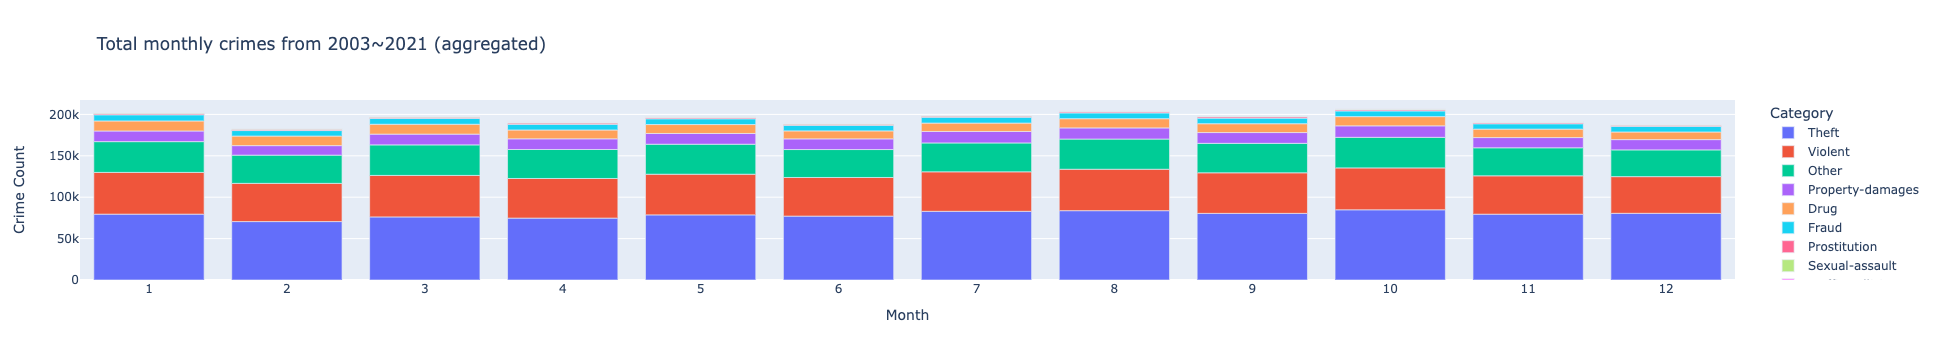

In [85]:
monthly_crime_cat = df.groupby(['Month', 'Category']).size().reset_index().sort_values(0, ascending=False)
fig = px.bar(monthly_crime_cat, x="Month", y=0, color="Category", title="Total monthly crimes from 2003~2021 (aggregated)", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(1,13)))

---

### 4. Trends of crimes

I wanted to see if there were any trends of crime over the years. 

- <b>1st figure:</b> Monthly crimes from 2003~2021.
- <b>2nd figure:</b> 12 months rolling average crimes from 2004~2021.

It seems like crimes were decreasing from 2004 until mid 2012. Crimes have been in upward trend from mid 2012 through early 2020 until the pandemic. As the city of San Francisco loosened up lockdowns, crimes have been increasing again. 

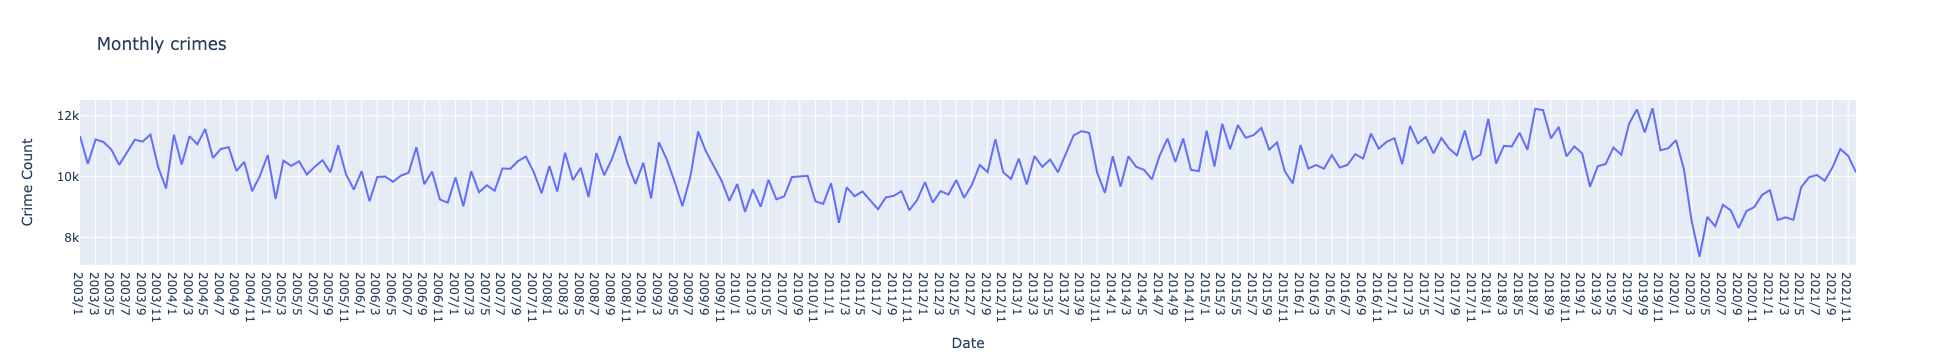

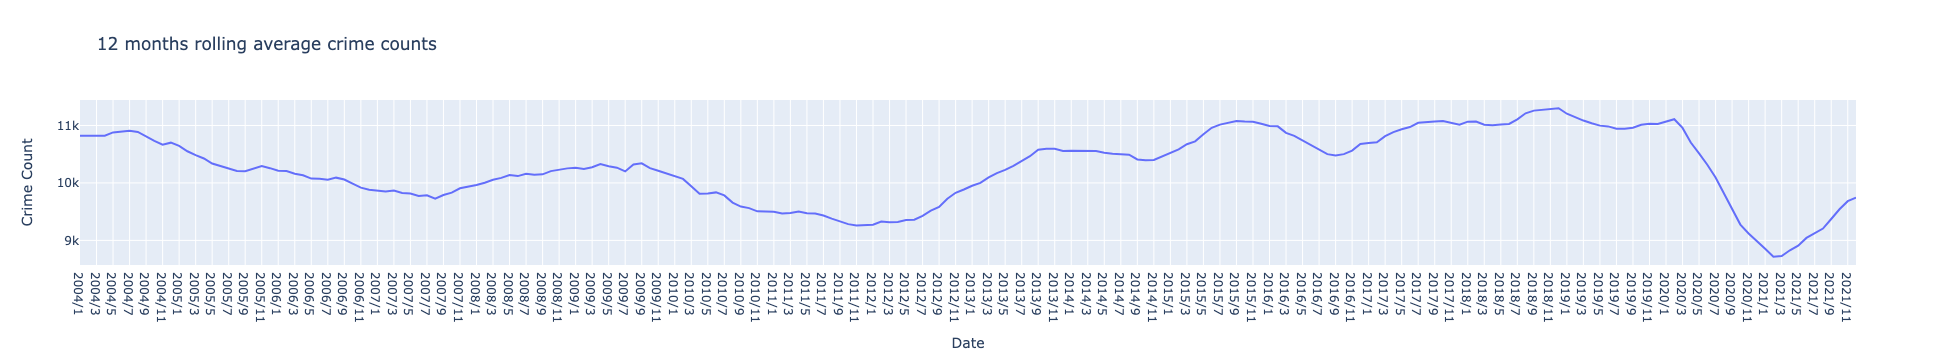

In [86]:
crime_count = df.groupby(['Year', 'Month']).size()
x = [f'{y}/{m}'for y, m in list(crime_count.index)]
fig = px.line(crime_count, x=x, y=crime_count.values, title="Monthly crimes", labels={'x':'Date', 'y':'Crime Count'})
fig.show()

crime_trend = crime_count.rolling(12).mean()[12:]
x_ = x[12:]
fig = px.line(crime_trend, x=x_, y=0, title="12 months rolling average crime counts", labels={'x':'Date', '0':'Crime Count'})
fig.show()

---

### 5. Threat to community (TTC) crimes trend

I wanted to analyze if "threat to community" (TTC) crimes were increasing in San Francisco. I considered TTC crimes that are in the category of 'Violent', 'Theft', 'Property-damages', 'Sexual-assault', and 'Homicide'. I chose these categories because these crimes affect the people and community directly. I will be referencing TTC crimes going forward.

- <b>1st figure:</b> Monthly TTC crimes from 2003~2021.
- <b>2nd figure:</b> 12 months rolling average TTC crimes from 2004~2021. 
- <b>3rd figure:</b> Annual TTC crimes from 2003~2021.

The trend of TTC crimes have more fluctuation compared to the overall crime counts, but they both follow a similar trend. TTC crimes were decreasing from 2004 until early 2012 and have been in an upward trend through early 2020 until the pandemic. TTC crimes have also been increasing in 2021 as San Francisco loosened up lockdowns.

I was also curious to know the effects of [Proposition 47](https://www.courts.ca.gov/prop47.htm) that was passed in 2014 as a California ballot initiative, under which theft of less than $950 in goods is treated as a nonviolent misdemeanor and rarely prosecuted. Many [articles](https://www.wsj.com/articles/san-francisco-shoplifters-theft-walgreens-decriminalized-11634678239) point out that theft have been increasing throughout California since this law passed. 

We can observe that theft decreased from 2005~2010 and started to increase since 2011. Ever since Proposition 47 passed in 2014, the number of theft crimes have been in an upward trend. Critiques will argue that this law had made our streets more unsafe. However, the overall TTC crimes have decreased as well. We don't know if these results were the direct effects from Proposition 47 and it is debatable if this law made the streets of San Francisco unsafer or not.

In [87]:
threats_lst = ['Violent', 'Theft', 'Property-damages', 'Sexual-assault', 'Homicide']
threat_crimes = df[df.Category.apply(lambda x: True if x in threats_lst else False)]

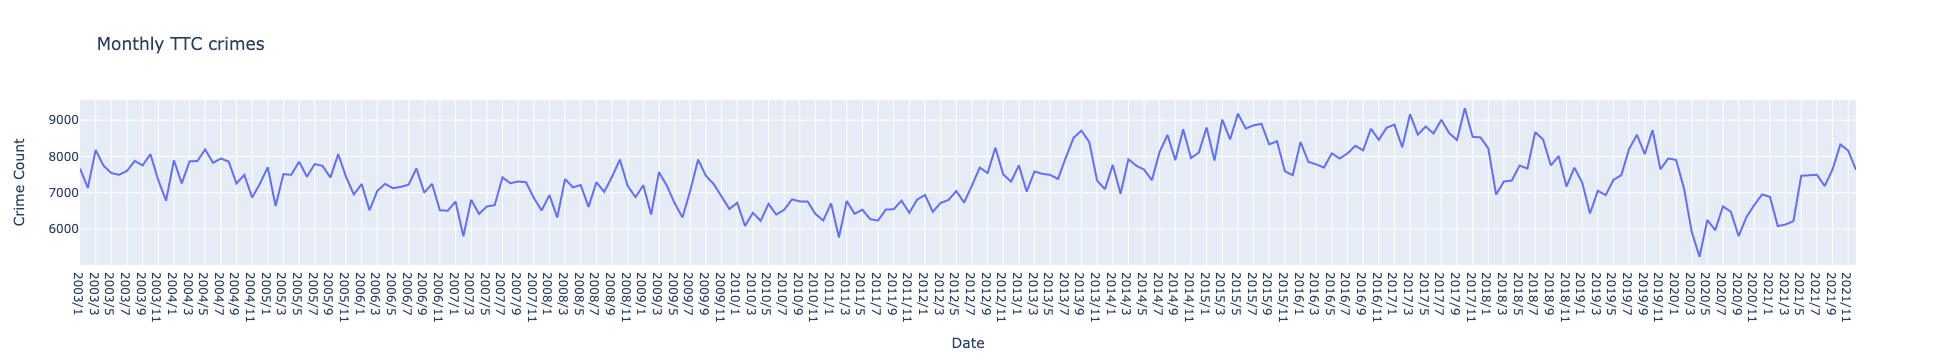

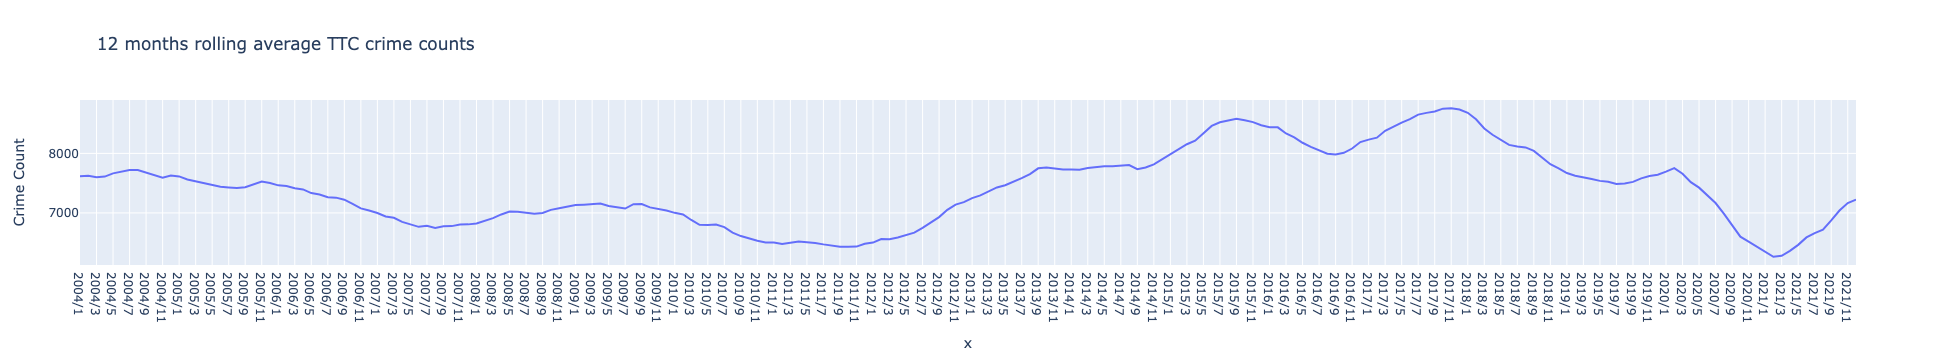

In [88]:
threat_crimes_monthly = threat_crimes.groupby(['Year', 'Month']).size().reset_index()
x = [f'{y}/{m}' for y, m in zip(threat_crimes_monthly.Year, threat_crimes_monthly.Month)]
fig = px.line(threat_crimes_monthly, x=x, y=0, title="Monthly TTC crimes", labels={'x': 'Date', '0':'Crime Count'})
fig.show()

threat_crime_trend = threat_crimes_monthly.rolling(12).mean()[12:]
x_ = x[12:]
fig = px.line(threat_crime_trend, x=x_, y=0, title="12 months rolling average TTC crime counts", labels={'x_':'Date', '0':'Crime Count'})
fig.show()

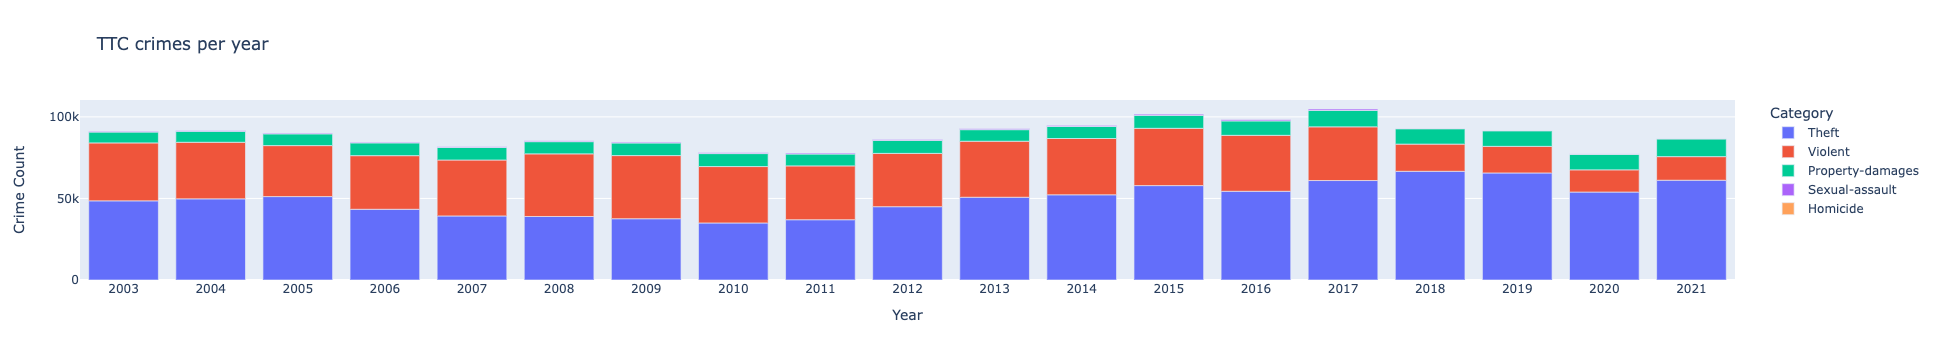

In [89]:
threat_crimes_category = threat_crimes.groupby(['Year', 'Category']).size().reset_index().sort_values(0, ascending=False)
fig = px.bar(threat_crimes_category, x="Year", y=0, color='Category', title="TTC crimes per year", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(2003,2022)))

---

### 6. TTC Crimes per Police District / Neighborhoods

I wanted to know the TTC crime counts in different police districts and neighborhoods. If I know which area have more crime, I can inform my friends to avoid those areas.

- <b>1st figure:</b> Total TTC crime counts of each police district from 2003 ~ 2021. (Please note that in May 2018, the San Francisco police department transitioned to a new data warehousing system so the trend from 2017 and 2018 are not consisent)
- <b>2nd figure:</b> TTC crimes for each neighborhood from 2003~2021. (Please note when the neighborhood was not specified in the case, I replaced them with police districts.)
- <b>3rd figure:</b> Percentage "Financial District/South Beach" neighborhood responsible for all TTC crimes in San Francisco from 2003~2021.
- <b>4th figure:</b> TTC crimes per neighborhood from 2003~2021.

From 2003~2017 we can see that Southern police district had the most number of TTC crimes. After SFPD transitioned to a new database system in 2018, the Central and Northeren police districts have the most crimes. 

Since police districts are broad and they don't really locate the neighborhood accruately, I looked into the TTC crimes per each neighborhood. We can observe that the "Finanicial District/South Beach" neighborhood had by far the highest TTC crimes of all neighborhoods. From 2003 ~ 2019, "Finanicial District/South Beach neighborhood" was responsible for 17%~23% of all TTC crimes in San Francisco. Since this neighborhood is located in downtown, the percentage of total TTC crimes have decreased to 13% in 2020 and 2021 due to the pandemic. As more people work from home, there are simply less people in downtown, hence there are fewer crimes there.

In [90]:
threat_crimes_pd = threat_crimes.groupby(['PD', 'Year']).size().reset_index().sort_values(0, ascending=False)
threat_crimes_pd_yr = pd.crosstab(index=[threat_crimes_pd.PD], columns=threat_crimes_pd.Year, values=threat_crimes_pd[0], aggfunc='sum')
threat_crimes_pd_yr = threat_crimes_pd_yr.fillna(0).astype(int)
threat_crimes_pd_yr.style.background_gradient(cmap = 'Reds')

In [91]:
threat_crimes_nh = threat_crimes.groupby(['Neighborhood', 'Year']).size().reset_index().sort_values(0, ascending=False)
threat_crimes_nh_yr = pd.crosstab(index=[threat_crimes_nh.Neighborhood], columns=threat_crimes_nh.Year, values=threat_crimes_nh[0], aggfunc='sum')
threat_crimes_nh_yr = threat_crimes_nh_yr.fillna(0).astype(int)
threat_crimes_nh_yr.style.background_gradient(cmap = 'Reds')

In [92]:
np.round(threat_crimes_nh_yr[threat_crimes_nh_yr.index == 'Financial District/South Beach'] / threat_crimes_nh_yr.sum(), 2)

Year                            2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
Neighborhood                                                                                                                                    
Financial District/South Beach  0.19  0.18  0.18  0.19   0.2  0.19   0.2  0.22  0.22  0.22  0.22  0.23  0.23  0.22  0.21  0.18  0.17  0.13  0.13

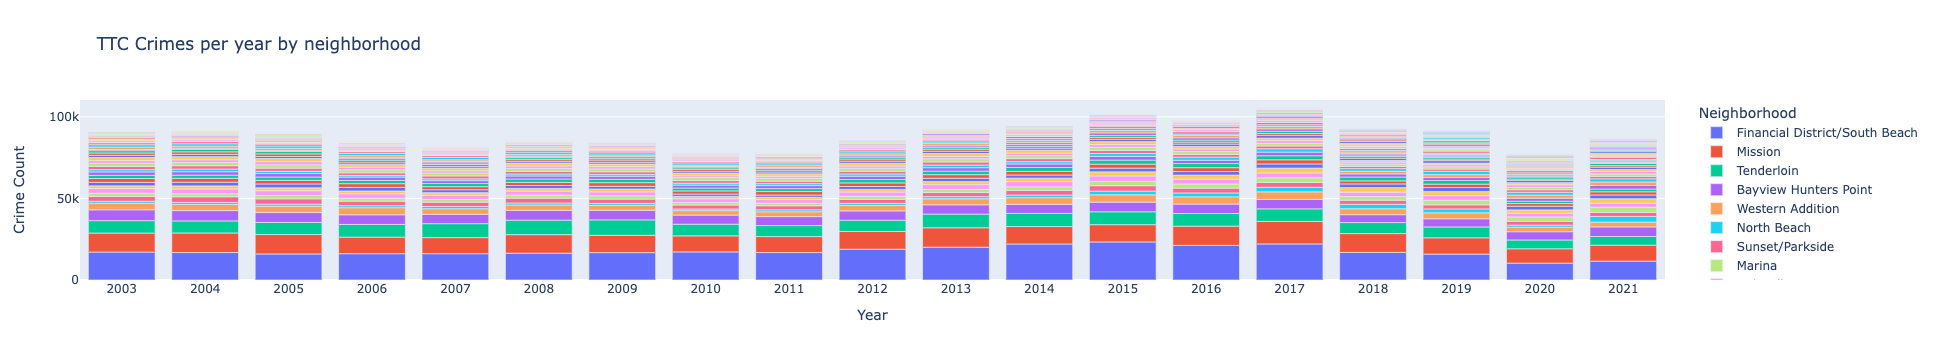

In [93]:
threat_crimes_nh_date = threat_crimes.groupby(['Year', 'Neighborhood']).size().reset_index().sort_values(0, ascending=False)
fig = px.bar(threat_crimes_nh_date, x="Year", y=0, color='Neighborhood', title="TTC Crimes per year by neighborhood", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(2003,2022)))

---

### 7. TTC Crimes in top 5 neighborhoods

I realized that the top 5 neighborhooods for TTC crimes have always been 'Financial District/South Beach', 'Mission', 'Tenderloin', 'Bayview Hunters Point', and 'Western Addition'. I wanted to see how much of these top 5 neighborhoods are responsible for TTC crimes in San Francisco. 

- <b>1st figure:</b> Percentage of the top 5 neighborhoods responsible for all TTC crimes in San Francisco from 2003~2021. 
- <b>2nd figure:</b> Total percentage of the top 5 neighborhoods responsible for all TTC crimes in San Francisco from 2003~2021.

We can observe that from 2003 ~ 2017, the top 5 neighborhoods were responsible for more than 50% of TTC crimes in San Francisco. That rate had steadily decreased since 2018 and it is now at the lowest point at around 40%. This implies that the TTC crimes were heavily (and still is) concentrated in these areas. Since the overall TTC crimes increased in 2021, but the top 5 neighborhoods decreased, we can imply that TTC crimes have been scattered to other neighborhoods. 

In [94]:
threat_crimes_top5 = threat_crimes[threat_crimes.Neighborhood.apply(
    lambda x: True if x in ['Financial District/South Beach', 'Mission', 'Tenderloin', 'Bayview Hunters Point', 'Western Addition'] else False)]

In [104]:
pd.options.display.float_format = "{:,.2f}".format

In [112]:
threat_crimes_top5_yr_nh = threat_crimes_top5.groupby(['Year', 'Neighborhood']).size().reset_index()
threat_crimes_top5_yr_x_nh = pd.crosstab(index=[threat_crimes_top5_yr_nh.Neighborhood], columns=threat_crimes_top5_yr_nh.Year, values=threat_crimes_top5_yr_nh[0], aggfunc='sum')
threat_crimes_top5_yr_x_nh = threat_crimes_top5_yr_x_nh.fillna(0).astype(int) / threat_crimes_nh_yr.sum()
# threat_crimes_top5_yr_x_nh = threat_crimes_top5_yr_x_nh.T
threat_crimes_top5_yr_x_nh.style.background_gradient(cmap = 'Reds', axis=0)

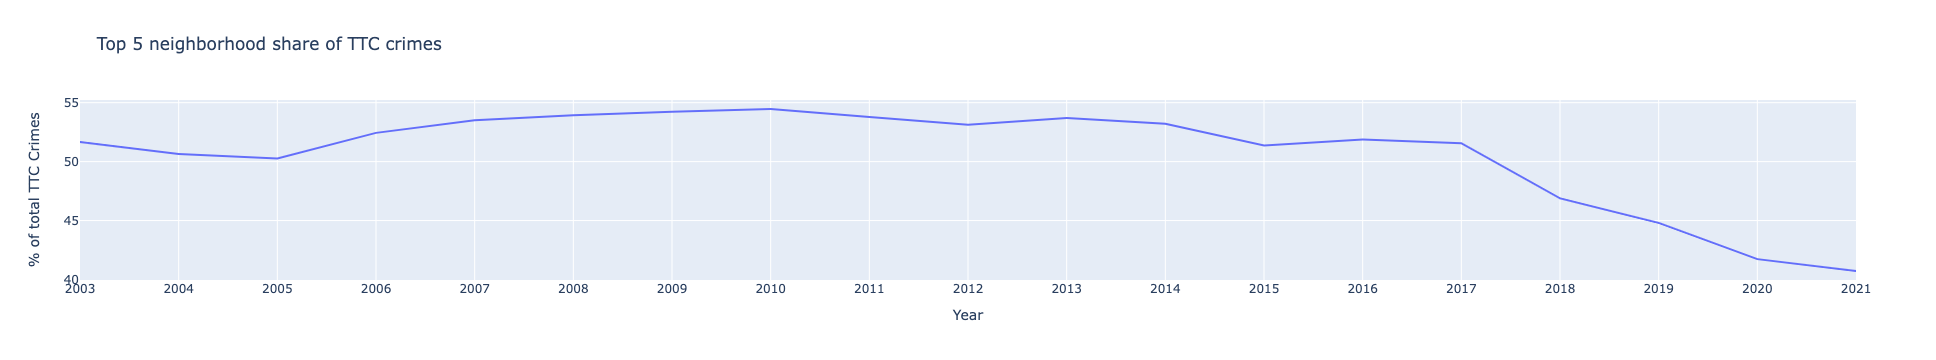

In [363]:
threat_crimes_top5_share = threat_crimes_top5_yr_x_nh.sum().reset_index()
threat_crimes_top5_share[0] = threat_crimes_top5_share[0] * 100
fig = px.line(threat_crimes_top5_share, x="Year", y=0, title="Top 5 neighborhood share of TTC crimes", labels={'0':'% of total TTC Crimes'})
fig.update_xaxes(dtick=list(range(2003,2022)))

---

### 8. TTC crimes excluding top 5 neighborhoods

I was curious to know the trend of TTC crime excluding the top 5 neighborhoods since TTC crimes have been scattered to other neighborhoods. I wanted to identify which neighborhoods have TTC crimes back to pr-pandemic levels.

- <b>1st figure:</b> Total TTC crimes excluding top 5 neighborhoods from 2003 ~ 2021. 
- <b>2nd figure:</b> Total TTC crimes per neighborhood (excluding top 5) from 2003 ~ 2021. 
- <b>3rd figure:</b> 2021 TTC crime increase rate of all neighborhood compared to 2019.

We can observe that TTC crimes are back in pre-pandemic levels in 2021 when we exclude the top 5 neighborhoods. People who live outside of the top 5 neighbhorhoods are experiencing pre-pandemic level of TTC crimes. In fact, more than 70% of the neighborhoods are back at 90% of 2019 levels.

In [365]:
threat_crimes_excl = threat_crimes[threat_crimes.Neighborhood.apply(
    lambda x: True if x not in ['Financial District/South Beach', 'Mission', 'Tenderloin', 'Bayview Hunters Point', 'Western Addition'] else False)]

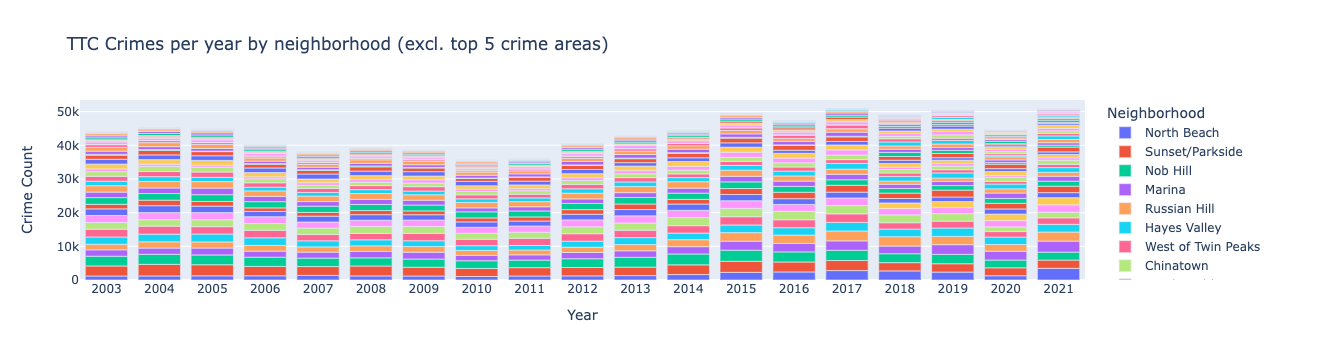

In [338]:
threat_crimes_nh_date_excl = threat_crimes_excl.groupby(['Year', 'Neighborhood']).size().reset_index().sort_values(0, ascending=False)
fig = px.bar(threat_crimes_nh_date_excl, x="Year", y=0, color='Neighborhood', title="TTC Crimes per year by neighborhood (excl. top 5 crime areas)", labels={'0':'Crime Count'})
fig.update_xaxes(dtick=list(range(2003,2022)))

In [261]:
threat_crimes_excl_yr_nh = threat_crimes_excl.groupby(['Year', 'Neighborhood']).size().reset_index()
threat_crimes_excl_yr_x_nh = pd.crosstab(index=[threat_crimes_excl_yr_nh.Neighborhood], columns=threat_crimes_excl_yr_nh.Year, values=threat_crimes_excl_yr_nh[0], aggfunc='sum')
threat_crimes_excl_yr_x_nh = threat_crimes_excl_yr_x_nh.fillna(0).astype(int)
threat_crimes_excl_yr_x_nh.style.background_gradient(cmap = 'Reds', axis=0)

In [377]:
threat_crimes_excl_2019_comparison = (threat_crimes_excl_yr_x_nh.loc[:, 2021] / threat_crimes_excl_yr_x_nh.loc[:, 2019]).reset_index().sort_values(0, ascending=False)
threat_crimes_excl_2019_comparison.columns = ['Neighborhood', '2019_comparison']
threat_crimes_excl_2019_comparison.style.background_gradient(cmap = 'Reds', axis=0)

In [385]:
# Neighborhoods that experience TTC crimes of more than 90% of 2019 level
(threat_crimes_excl_2019_comparison["2019_comparison"] > 0.9).sum() / threat_crimes_excl_2019_comparison["2019_comparison"].count()

0.7045454545454546